<a href="https://colab.research.google.com/github/camilagonzalezquevedo/Tarea_2_Mec_Estadist/blob/main/P4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy
!pip install matplotlib

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math

In [6]:
L = 6
N = L * L
T_list = np.linspace(0.5, 5.0, 50)
nsteps = 10000
J = 1


def calculate_energy(S, L):
    energy = 0
    for i in range(L):
        for j in range(L):
            S_ij = S[i, j]
            #condiciones periodicas
            neighbors = S[i, (j+1) % L] + S[i, (j-1) % L] + S[(i+1) % L, j] + S[(i-1) % L, j]
            energy -= J * S_ij * neighbors
    return energy / 2

#algoritmo de Wolff
def wolff_step(S, T):
    p = 1 - math.exp(-2.0 * J / T)  #probabilidad de añadir un sitio al cluster
    i, j = random.randint(0, L-1), random.randint(0, L-1)
    cluster = [(i, j)]  #inicio del cluster
    to_flip = [(i, j)]
    S0 = S[i, j]

    while to_flip:
        (i, j) = to_flip.pop()
        for di, dj in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
            ni, nj = (i + di) % L, (j + dj) % L
            if S[ni, nj] == S0 and (ni, nj) not in cluster and random.random() < p:
                cluster.append((ni, nj))
                to_flip.append((ni, nj))

    for (i, j) in cluster:
        S[i, j] *= -1


def calculate_magnetization(S):
    return np.sum(S)


def run_wolff(L, T_list, nsteps):
    E_list, Cv_list = [], []
    S = np.ones((L, L))

    for T in T_list:
        E_tot, E2_tot = 0, 0
        for step in range(nsteps):
            wolff_step(S, T)
            E = calculate_energy(S, L)
            E_tot += E
            E2_tot += E ** 2


        E_av = E_tot / nsteps
        E2_av = E2_tot / nsteps
        Cv = (E2_av - E_av ** 2) / (T ** 2 * N)

        E_list.append(E_av / N)
        Cv_list.append(Cv)
        print(f"T = {T:.2f}, E = {E_av / N:.4f}, Cv = {Cv:.4f}")

    return E_list, Cv_list

#red 6x6
E_list, Cv_list = run_wolff(L, T_list, nsteps)


T = 0.50, E = -2.0000, Cv = 0.0000
T = 0.59, E = -2.0000, Cv = 0.0000
T = 0.68, E = -1.9999, Cv = 0.0015
T = 0.78, E = -1.9997, Cv = 0.0038
T = 0.87, E = -1.9991, Cv = 0.0094
T = 0.96, E = -1.9980, Cv = 0.0181
T = 1.05, E = -1.9954, Cv = 0.0348
T = 1.14, E = -1.9923, Cv = 0.0505
T = 1.23, E = -1.9860, Cv = 0.0800
T = 1.33, E = -1.9783, Cv = 0.1088
T = 1.42, E = -1.9648, Cv = 0.1517
T = 1.51, E = -1.9487, Cv = 0.1973
T = 1.60, E = -1.9268, Cv = 0.2685
T = 1.69, E = -1.9000, Cv = 0.3424
T = 1.79, E = -1.8677, Cv = 0.4111
T = 1.88, E = -1.8226, Cv = 0.5193
T = 1.97, E = -1.7674, Cv = 0.6319
T = 2.06, E = -1.7059, Cv = 0.7506
T = 2.15, E = -1.6392, Cv = 0.8464
T = 2.24, E = -1.5335, Cv = 0.9856
T = 2.34, E = -1.4447, Cv = 1.0234
T = 2.43, E = -1.3435, Cv = 1.0542
T = 2.52, E = -1.2451, Cv = 1.0011
T = 2.61, E = -1.1932, Cv = 0.8999
T = 2.70, E = -1.0989, Cv = 0.8264
T = 2.80, E = -1.0283, Cv = 0.7294
T = 2.89, E = -0.9559, Cv = 0.6336
T = 2.98, E = -0.9121, Cv = 0.5829
T = 3.07, E = -0.853

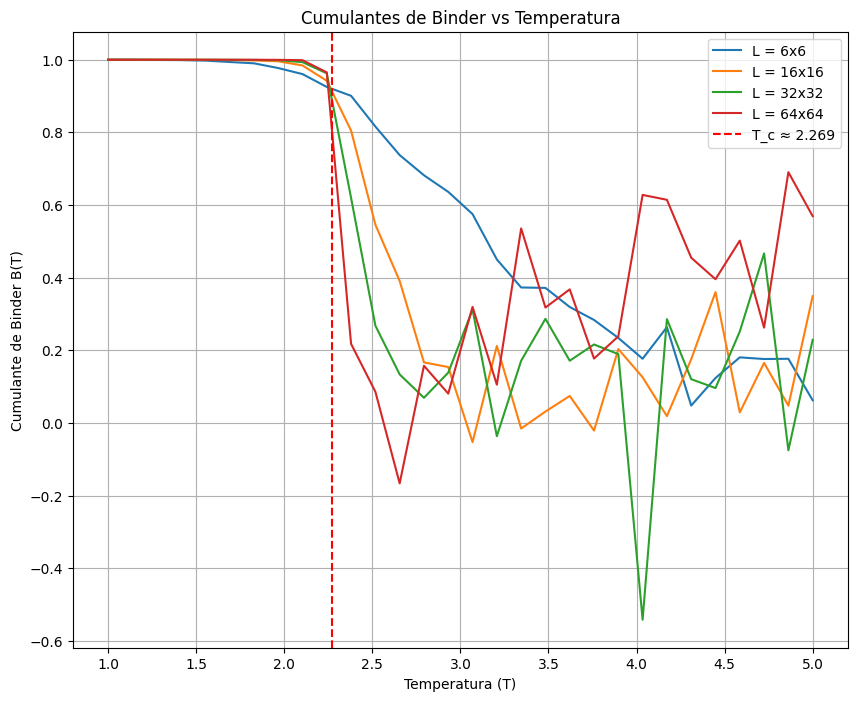

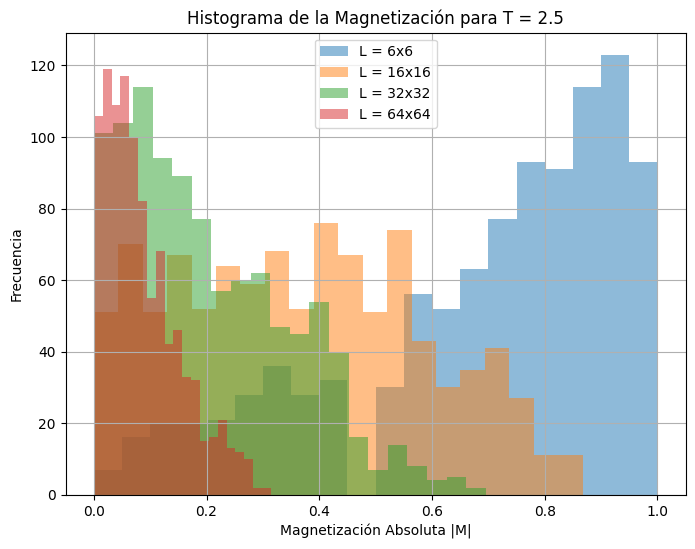

In [7]:
#algoritmo de Wolff (Cluster-Ising)
def wolff_step(S, L, T):
    J = 1
    p = 1 - math.exp(-2.0 * J / T)
    i, j = random.randint(0, L-1), random.randint(0, L-1)
    cluster = [(i, j)]
    to_flip = [(i, j)]
    S0 = S[i, j]

    while to_flip:
        (i, j) = to_flip.pop()
        for di, dj in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
            ni, nj = (i + di) % L, (j + dj) % L
            if S[ni, nj] == S0 and (ni, nj) not in cluster and random.random() < p:
                cluster.append((ni, nj))
                to_flip.append((ni, nj))

    for (i, j) in cluster:
        S[i, j] *= -1


def calculate_magnetization(S):
    return np.sum(S)


def calculate_binder_cumulant(magnetizations, L):
    m2 = np.mean(magnetizations ** 2)
    m4 = np.mean(magnetizations ** 4)
    return 0.5 * (3 - (m4 / (m2 ** 2)))

#correr Wolff
def run_wolff_simulation(L, T_list, nsteps):
    S = np.ones((L, L))  #spins up
    magnetizations = []

    for T in T_list:
        M_list = []
        for step in range(nsteps):
            wolff_step(S, L, T)
            M = calculate_magnetization(S)
            M_list.append(abs(M))

        M_list = np.array(M_list) / (L * L)
        magnetizations.append(M_list)

    return magnetizations

#cumulantes de Binder and histogramas
def binder_cumulants_and_histograms(L_sizes, T_list, nsteps):
    plt.figure(figsize=(10, 8))

    for L in L_sizes:
        magnetizations = run_wolff_simulation(L, T_list, nsteps)
        cumulants = []

        #cumulantes de Binder
        for i, T in enumerate(T_list):
            B = calculate_binder_cumulant(magnetizations[i], L)
            cumulants.append(B)


        plt.plot(T_list, cumulants, label=f"L = {L}x{L}")

    plt.axvline(x=2 / np.log(1 + np.sqrt(2)), color='r', linestyle='--', label="T_c ≈ 2.269")
    plt.title("Cumulantes de Binder vs Temperatura")
    plt.xlabel("Temperatura (T)")
    plt.ylabel("Cumulante de Binder B(T)")
    plt.legend()
    plt.grid(True)
    plt.show()

    #para T = 2.5
    plt.figure(figsize=(8, 6))

    T_index = np.argmin(np.abs(T_list - 2.5))

    for L in L_sizes:
        magnetizations = run_wolff_simulation(L, T_list, nsteps)
        plt.hist(magnetizations[T_index], bins=20, alpha=0.5, label=f"L = {L}x{L}")

    plt.title("Histograma de la Magnetización para T = 2.5")
    plt.xlabel("Magnetización Absoluta |M|")
    plt.ylabel("Frecuencia")
    plt.legend()
    plt.grid(True)
    plt.show()


L_sizes = [6, 16, 32, 64]
T_list = np.linspace(1.0, 5.0, 30)
nsteps = 1000


binder_cumulants_and_histograms(L_sizes, T_list, nsteps)
